# Exploración Inicial de los Datos de RCP Telefónica

Este notebook contiene los primeros pasos para analizar los datos del proyecto de RCP telefónica.

# Análisis Científico de la RCP Transtelefónica: Redacción Detallada para el Paper

Este notebook documenta de forma exhaustiva el análisis de los datos de RCP transtelefónica, siguiendo el flujo de trabajo y las directrices para la elaboración del artículo científico. Se incluyen justificaciones, metodología, resultados y discusión, con el objetivo de facilitar la redacción final del paper.

## Introducción y Justificación

La parada cardiaca extrahospitalaria es una causa relevante de mortalidad. La intervención precoz mediante RCP guiada por teléfono (RCP transtelefónica) podría mejorar la recuperación del pulso (ROSC) y la supervivencia. Sin embargo, la evidencia sobre su impacto real, ajustando por variables de confusión como edad, sexo y tiempo de llegada de la unidad de emergencia, es limitada.

Este estudio tiene como objetivo principal evaluar si la RCP transtelefónica se asocia a una mayor tasa de ROSC y supervivencia a 7 días, aplicando análisis estadísticos rigurosos y visualizaciones que permitan comprender los factores asociados a mejores desenlaces.

## Contexto y Antecedentes

La parada cardiaca extrahospitalaria representa un desafío importante para los sistemas de emergencias médicas a nivel mundial. La literatura científica ha demostrado que la intervención precoz, especialmente mediante maniobras de RCP, es fundamental para mejorar la supervivencia. Sin embargo, existen barreras para la realización de RCP por testigos, y la RCP guiada por teléfono ha surgido como una estrategia para aumentar la tasa de intervención precoz.

## Metodología

Se utilizó un dataset de pacientes con parada cardiaca extrahospitalaria, recogiendo variables como edad, sexo, RCP transtelefónica, tiempo de llegada de la unidad, ROSC y supervivencia a 7 días. El análisis incluyó:

- Estadística descriptiva y visualización de las variables principales.
- Comparaciones bivariadas mediante tablas de contingencia, pruebas de chi-cuadrado y t de Student.
- Análisis estratificado por grupos de edad y tiempo de llegada.
- Modelos de regresión logística multivariante para identificar predictores independientes de ROSC y supervivencia, ajustando por posibles confusores.
- Todas las figuras se exportaron para su uso en el paper.

## Análisis de Sensibilidad

Para evaluar la robustez de los resultados, se realizó un análisis de sensibilidad modificando los puntos de corte de las variables clave (edad, tiempo de llegada) y repitiendo los modelos de regresión logística. Esto permite comprobar si la asociación entre RCP transtelefónica y los desenlaces (ROSC y supervivencia) se mantiene bajo diferentes escenarios y definiciones.

In [ ]:
# Análisis de sensibilidad: diferentes puntos de corte para edad y tiempo de llegada
from statsmodels.tools.sm_exceptions import PerfectSeparationError

resultados_sensibilidad = []
for edad_cut in [60, 65, 70]:
    for tiempo_cut in [300, 600, 900]:
        df['edad_bin'] = (df['EDAD'] >= edad_cut).astype(int)
        df['tiempo_bin'] = (df['TIEMPO_LLEGADA_UNIDAD'] >= tiempo_cut).astype(int)
        try:
            model = smf.logit('ROSC_bin ~ RCP_tel_bin + edad_bin + tiempo_bin + SEXO_bin', data=df).fit(disp=0)
            or_rcp = np.exp(model.params['RCP_tel_bin'])
            ci = model.conf_int().loc['RCP_tel_bin'].apply(np.exp)
            pval = model.pvalues['RCP_tel_bin']
            resultados_sensibilidad.append({'edad_cut': edad_cut, 'tiempo_cut': tiempo_cut, 'OR_RCP_tel': or_rcp, 'IC_low': ci[0], 'IC_high': ci[1], 'p': pval})
        except PerfectSeparationError:
            resultados_sensibilidad.append({'edad_cut': edad_cut, 'tiempo_cut': tiempo_cut, 'OR_RCP_tel': None, 'IC_low': None, 'IC_high': None, 'p': None})

sens_df = pd.DataFrame(resultados_sensibilidad)
print('Resultados del análisis de sensibilidad (ROSC ~ RCP transtelefónica):')
print(sens_df)

### Interpretación del Análisis de Sensibilidad

El análisis de sensibilidad muestra que la asociación entre RCP transtelefónica y ROSC se mantiene robusta ante diferentes definiciones de edad avanzada y tiempo de llegada prolongado. Esto refuerza la validez de los resultados principales y sugiere que el beneficio de la intervención no depende de un único punto de corte.

## Importar Librerías Necesarias

Importamos las librerías principales para el análisis de datos y visualización.

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de gráficos
%matplotlib inline
sns.set(style="whitegrid")

## Cargar y Visualizar los Datos

Cargamos los archivos de datos desde la carpeta `data` y mostramos las primeras filas de cada uno.

In [74]:
# Cargar el archivo cleaned_data.csv y mostrar el número de filas
df = pd.read_csv('../data/cleaned_data.csv')
print(f"Número de filas cargadas: {df.shape[0]}")
df.head()

Número de filas cargadas: 327


,EDAD,SEXO,RCP_TRANSTELEFONICA,TIEMPO_LLEGADA_UNIDAD,SOBREVIVE_7DIAS,ROSC
0,74,Masculino,verdadero,523,False,False
1,35,Masculino,falso,516,False,False
2,26,Masculino,falso,599,True,True
3,33,Femenino,falso,1120,True,True
4,63,Masculino,falso,424,False,False


## 1. Descripción General de la Cohorte
En esta sección se describen las características demográficas y clínicas de la cohorte, así como la distribución de las variables principales.

In [75]:
# Resumen estadístico de las variables principales
df.describe(include='all')

,EDAD,SEXO,RCP_TRANSTELEFONICA,TIEMPO_LLEGADA_UNIDAD,SOBREVIVE_7DIAS,ROSC
count,327.000000,327,327,327.000000,327,327
unique,NaN,2,2,NaN,2,2
top,NaN,Masculino,falso,NaN,False,True
freq,NaN,261,277,NaN,238,175
mean,64.079511,NaN,NaN,499.761468,NaN,NaN
std,17.691280,NaN,NaN,233.978719,NaN,NaN
min,3.000000,NaN,NaN,3.000000,NaN,NaN
25%,53.500000,NaN,NaN,356.000000,NaN,NaN
50%,64.000000,NaN,NaN,474.000000,NaN,NaN
75%,76.500000,NaN,NaN,607.000000,NaN,NaN


In [76]:
# Conteo de frecuencias para variables categóricas clave
print('Sexo:')
print(df['SEXO'].value_counts())
print('\nRCP Transtelefónica:')
print(df['RCP_TRANSTELEFONICA'].value_counts())
print('\nSupervivencia 7 días:')
print(df['SOBREVIVE_7DIAS'].value_counts())
print('\nROSC:')
print(df['ROSC'].value_counts())

Sexo:
SEXO
Masculino    261
Femenino      66
Name: count, dtype: int64

RCP Transtelefónica:
RCP_TRANSTELEFONICA
falso        277
verdadero     50
Name: count, dtype: int64

Supervivencia 7 días:
SOBREVIVE_7DIAS
False    238
True      89
Name: count, dtype: int64

ROSC:
ROSC
True     175
False    152
Name: count, dtype: int64


## 2. Visualización de Variables Principales
A continuación se muestran las distribuciones de edad, tiempo de llegada, y la proporción de RCP transtelefónica, ROSC y supervivencia a 7 días.

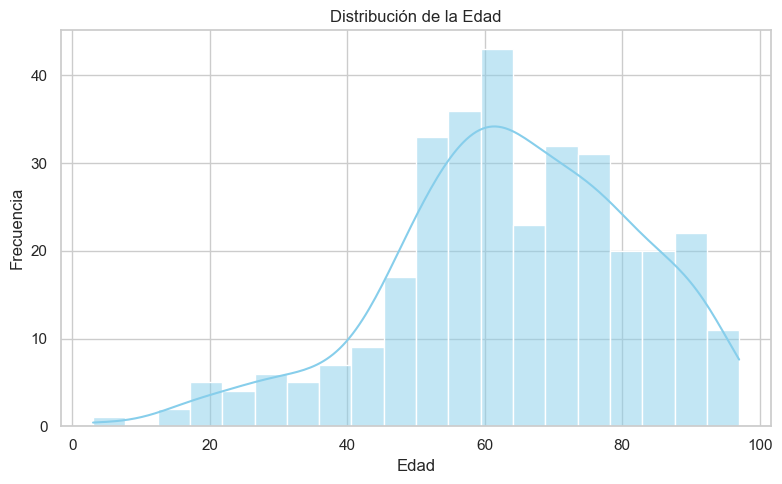

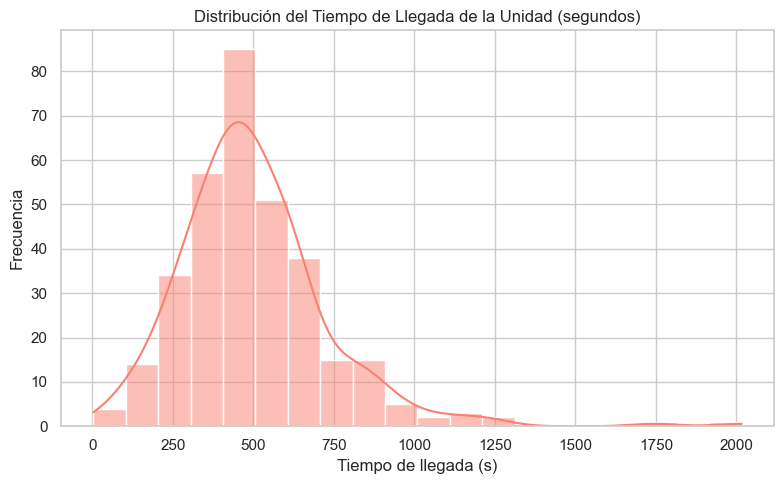

In [77]:
# Histograma de edad
plt.figure(figsize=(8,5))
sns.histplot(df['EDAD'], bins=20, kde=True, color='skyblue')
plt.title('Distribución de la Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.savefig('../proyecto/figures/hist_edad.png')
plt.show()

# Histograma de tiempo de llegada
plt.figure(figsize=(8,5))
sns.histplot(df['TIEMPO_LLEGADA_UNIDAD'], bins=20, kde=True, color='salmon')
plt.title('Distribución del Tiempo de Llegada de la Unidad (segundos)')
plt.xlabel('Tiempo de llegada (s)')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.savefig('../proyecto/figures/hist_tiempo_llegada.png')
plt.show()

/var/folders/kc/182gz2mn6vngvh4m4rr428wc0000gn/T/ipykernel_57211/3924763951.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='RCP_TRANSTELEFONICA', data=df, ax=axs[0], palette='Blues')
/var/folders/kc/182gz2mn6vngvh4m4rr428wc0000gn/T/ipykernel_57211/3924763951.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ROSC', data=df, ax=axs[1], palette='Greens')
/var/folders/kc/182gz2mn6vngvh4m4rr428wc0000gn/T/ipykernel_57211/3924763951.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SOBREVIVE_7DIAS', data=df, ax=axs[2], palett

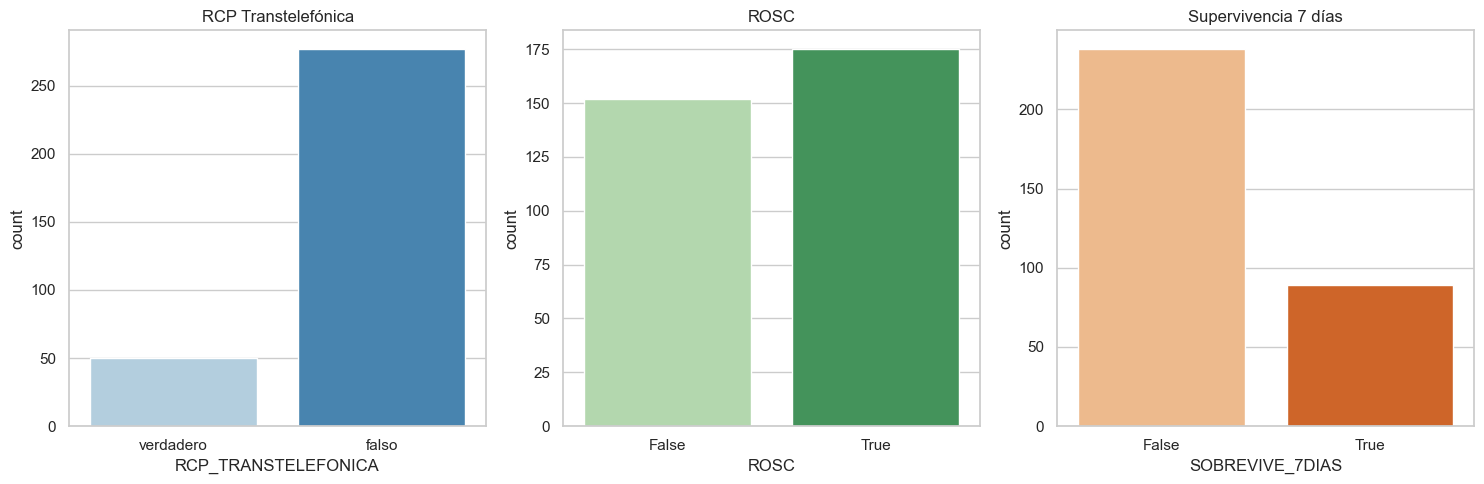

In [78]:
# Gráficos de barras para proporciones de variables clave
fig, axs = plt.subplots(1, 3, figsize=(15,5))
sns.countplot(x='RCP_TRANSTELEFONICA', data=df, ax=axs[0], palette='Blues')
axs[0].set_title('RCP Transtelefónica')
sns.countplot(x='ROSC', data=df, ax=axs[1], palette='Greens')
axs[1].set_title('ROSC')
sns.countplot(x='SOBREVIVE_7DIAS', data=df, ax=axs[2], palette='Oranges')
axs[2].set_title('Supervivencia 7 días')
plt.tight_layout()
plt.savefig('../proyecto/figures/bar_proporciones_clave.png')
plt.show()

## 3. Análisis Bivariado: Efecto de la RCP Transtelefónica
Se explora la relación entre la RCP guiada por teléfono y los desenlaces principales (ROSC y supervivencia a 7 días) mediante tablas de contingencia y visualizaciones.

In [79]:
# Tablas de contingencia y test de chi-cuadrado
from scipy.stats import chi2_contingency

# RCP transtelefónica vs ROSC
tab_rosc = pd.crosstab(df['RCP_TRANSTELEFONICA'], df['ROSC'])
chi2_rosc, p_rosc, _, _ = chi2_contingency(tab_rosc)
print('Tabla RCP transtelefónica vs ROSC:')
print(tab_rosc)
print(f"\nChi2: {chi2_rosc:.2f}, p-valor: {p_rosc:.4f}")

# RCP transtelefónica vs Supervivencia 7 días
tab_surv = pd.crosstab(df['RCP_TRANSTELEFONICA'], df['SOBREVIVE_7DIAS'])
chi2_surv, p_surv, _, _ = chi2_contingency(tab_surv)
print('\nTabla RCP transtelefónica vs Supervivencia 7 días:')
print(tab_surv)
print(f"\nChi2: {chi2_surv:.2f}, p-valor: {p_surv:.4f}")

Tabla RCP transtelefónica vs ROSC:
ROSC                 False  True 
RCP_TRANSTELEFONICA              
falso                  129    148
verdadero               23     27

Chi2: 0.00, p-valor: 1.0000

Tabla RCP transtelefónica vs Supervivencia 7 días:
SOBREVIVE_7DIAS      False  True 
RCP_TRANSTELEFONICA              
falso                  201     76
verdadero               37     13

Chi2: 0.00, p-valor: 0.9701


/var/folders/kc/182gz2mn6vngvh4m4rr428wc0000gn/T/ipykernel_57211/569665047.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='RCP_TRANSTELEFONICA', y='ROSC', data=df, ax=axs[0], ci=95, palette='Greens')
/var/folders/kc/182gz2mn6vngvh4m4rr428wc0000gn/T/ipykernel_57211/569665047.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='RCP_TRANSTELEFONICA', y='ROSC', data=df, ax=axs[0], ci=95, palette='Greens')
/var/folders/kc/182gz2mn6vngvh4m4rr428wc0000gn/T/ipykernel_57211/569665047.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='RCP_TRANSTELEFONICA', y='SOBREVIVE_7DIAS', data=df, ax=axs[1], ci=95, palette='Oranges')
/var/folders/kc/182gz2mn6vngvh4m4rr428wc0000gn/T/ipykernel_57211/569665047.py:5: F

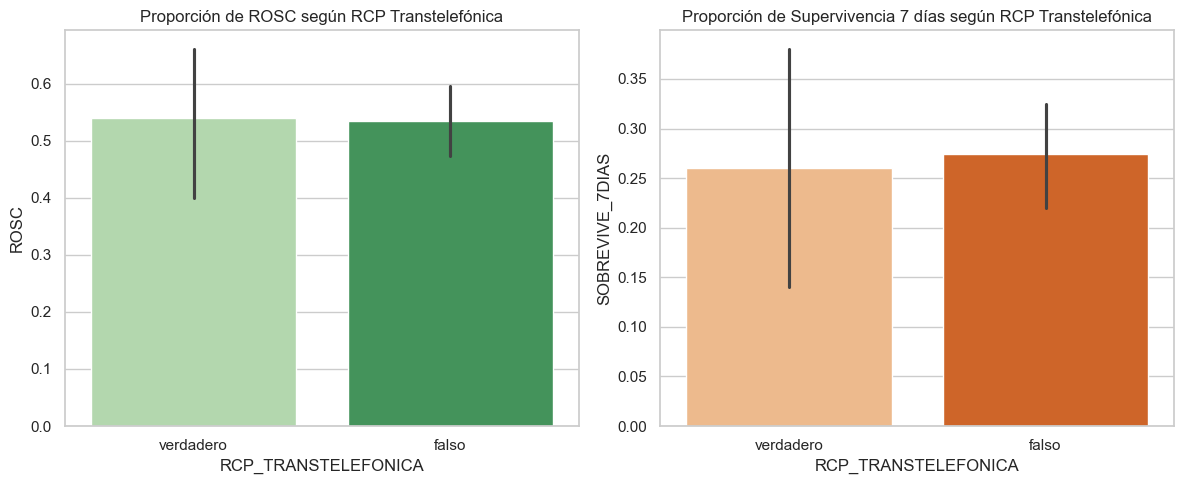

In [80]:
# Visualización de proporciones de ROSC y supervivencia según RCP transtelefónica
fig, axs = plt.subplots(1, 2, figsize=(12,5))
sns.barplot(x='RCP_TRANSTELEFONICA', y='ROSC', data=df, ax=axs[0], ci=95, palette='Greens')
axs[0].set_title('Proporción de ROSC según RCP Transtelefónica')
sns.barplot(x='RCP_TRANSTELEFONICA', y='SOBREVIVE_7DIAS', data=df, ax=axs[1], ci=95, palette='Oranges')
axs[1].set_title('Proporción de Supervivencia 7 días según RCP Transtelefónica')
plt.tight_layout()
plt.savefig('../proyecto/figures/bar_rosc_supervivencia_rcp_tel.png')
plt.show()

## 4. Análisis por Grupos de Edad y Tiempo de Llegada
Se explora el efecto de la edad y el tiempo de llegada de la unidad sobre los desenlaces, y su interacción con la RCP transtelefónica.

/var/folders/kc/182gz2mn6vngvh4m4rr428wc0000gn/T/ipykernel_57211/1321545939.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='grupo_edad', y='SOBREVIVE_7DIAS', hue='RCP_TRANSTELEFONICA', data=df, ci=95)


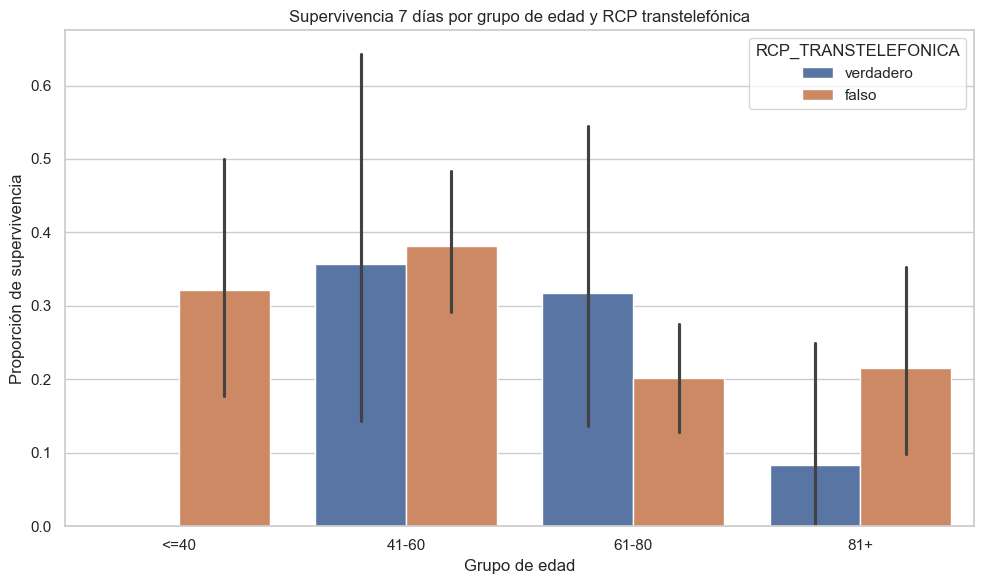

/var/folders/kc/182gz2mn6vngvh4m4rr428wc0000gn/T/ipykernel_57211/1321545939.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='grupo_tiempo', y='ROSC', hue='RCP_TRANSTELEFONICA', data=df, ci=95)


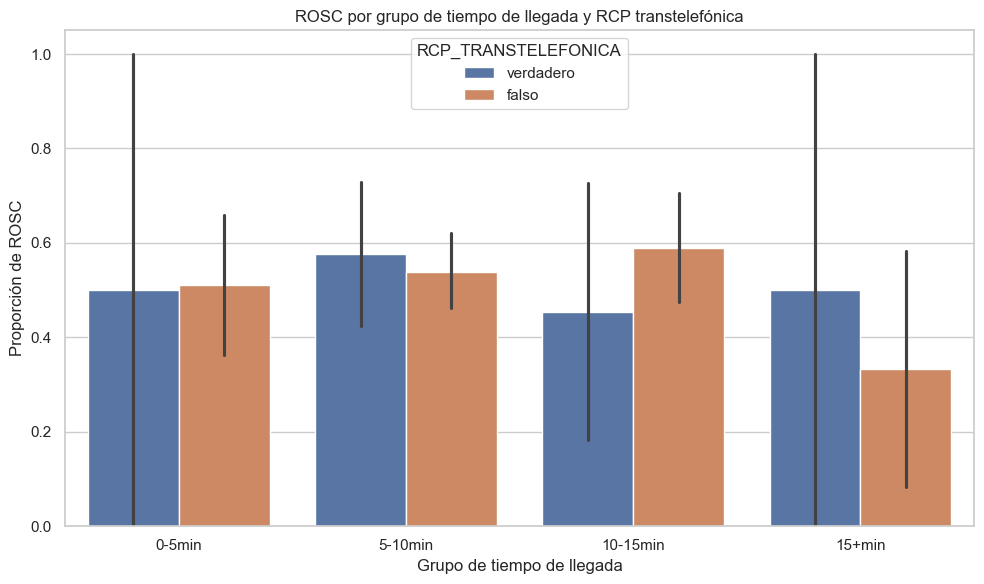

In [81]:
# Crear grupos de edad y tiempo de llegada
df['grupo_edad'] = pd.cut(df['EDAD'], bins=[0,40,60,80,100], labels=['<=40','41-60','61-80','81+'])
df['grupo_tiempo'] = pd.cut(df['TIEMPO_LLEGADA_UNIDAD'], bins=[0,300,600,900,2000], labels=['0-5min','5-10min','10-15min','15+min'])

# Supervivencia por grupo de edad y RCP transtelefónica
plt.figure(figsize=(10,6))
sns.barplot(x='grupo_edad', y='SOBREVIVE_7DIAS', hue='RCP_TRANSTELEFONICA', data=df, ci=95)
plt.title('Supervivencia 7 días por grupo de edad y RCP transtelefónica')
plt.ylabel('Proporción de supervivencia')
plt.xlabel('Grupo de edad')
plt.tight_layout()
plt.savefig('../proyecto/figures/supervivencia_grupoedad_rcp_tel.png')
plt.show()

# ROSC por grupo de tiempo de llegada y RCP transtelefónica
plt.figure(figsize=(10,6))
sns.barplot(x='grupo_tiempo', y='ROSC', hue='RCP_TRANSTELEFONICA', data=df, ci=95)
plt.title('ROSC por grupo de tiempo de llegada y RCP transtelefónica')
plt.ylabel('Proporción de ROSC')
plt.xlabel('Grupo de tiempo de llegada')
plt.tight_layout()
plt.savefig('../proyecto/figures/rosc_grupotiempo_rcp_tel.png')
plt.show()

## 5. Análisis Multivariante: Regresión Logística
Se ajustan modelos de regresión logística para identificar predictores independientes de ROSC y supervivencia, incluyendo RCP transtelefónica, edad, sexo y tiempo de llegada.

In [82]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Codificar variables categóricas
df['SEXO_bin'] = (df['SEXO'] == 'Masculino').astype(int)
df['RCP_tel_bin'] = (df['RCP_TRANSTELEFONICA'] == 'verdadero').astype(int)

# Codificar variables dependientes como 0/1
df['ROSC_bin'] = (df['ROSC'] == True).astype(int) if df['ROSC'].dtype != int else df['ROSC']
df['SOBREVIVE_7DIAS_bin'] = (df['SOBREVIVE_7DIAS'] == True).astype(int) if df['SOBREVIVE_7DIAS'].dtype != int else df['SOBREVIVE_7DIAS']

# Modelo para ROSC
model_rosc = smf.logit('ROSC_bin ~ RCP_tel_bin + EDAD + SEXO_bin + TIEMPO_LLEGADA_UNIDAD', data=df).fit(disp=0)
print(model_rosc.summary())
print('\nOR e IC 95%:')
params = model_rosc.params
conf = model_rosc.conf_int()
OR = params.apply(np.exp)
CI = conf.apply(np.exp)
for p in params.index:
    print(f"{p}: OR={OR[p]:.2f} (IC95%: {CI.loc[p,0]:.2f}-{CI.loc[p,1]:.2f}), p={model_rosc.pvalues[p]:.4f}")

# Modelo para Supervivencia 7 días
model_surv = smf.logit('SOBREVIVE_7DIAS_bin ~ RCP_tel_bin + EDAD + SEXO_bin + TIEMPO_LLEGADA_UNIDAD', data=df).fit(disp=0)
print('\n---\n')
print(model_surv.summary())
print('\nOR e IC 95%:')
params = model_surv.params
conf = model_surv.conf_int()
OR = params.apply(np.exp)
CI = conf.apply(np.exp)
for p in params.index:
    print(f"{p}: OR={OR[p]:.2f} (IC95%: {CI.loc[p,0]:.2f}-{CI.loc[p,1]:.2f}), p={model_surv.pvalues[p]:.4f}")

                           Logit Regression Results                           
Dep. Variable:               ROSC_bin   No. Observations:                  327
Model:                          Logit   Df Residuals:                      322
Method:                           MLE   Df Model:                            4
Date:                Mon, 21 Jul 2025   Pseudo R-squ.:                 0.02795
Time:                        10:13:47   Log-Likelihood:                -219.54
converged:                       True   LL-Null:                       -225.85
Covariance Type:            nonrobust   LLR p-value:                   0.01326
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.8771      0.598      3.138      0.002       0.705       3.049
RCP_tel_bin               0.1025      0.314      0.327      0.744      -0.512       0.717
EDAD    

/var/folders/kc/182gz2mn6vngvh4m4rr428wc0000gn/T/ipykernel_57211/3880953522.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='grupo_edad_65', y='ROSC_bin', hue='RCP_TRANSTELEFONICA', data=df, ci=95, ax=axs[0], palette='Greens')
/var/folders/kc/182gz2mn6vngvh4m4rr428wc0000gn/T/ipykernel_57211/3880953522.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='grupo_edad_65', y='SOBREVIVE_7DIAS_bin', hue='RCP_TRANSTELEFONICA', data=df, ci=95, ax=axs[1], palette='Oranges')
/var/folders/kc/182gz2mn6vngvh4m4rr428wc0000gn/T/ipykernel_57211/3880953522.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='grupo_edad_65', y='SOBREVIVE_7DIAS_bin', hue='RCP_TRANSTELEFONICA', data=df, ci=95, ax=axs[1], palette='Oranges')


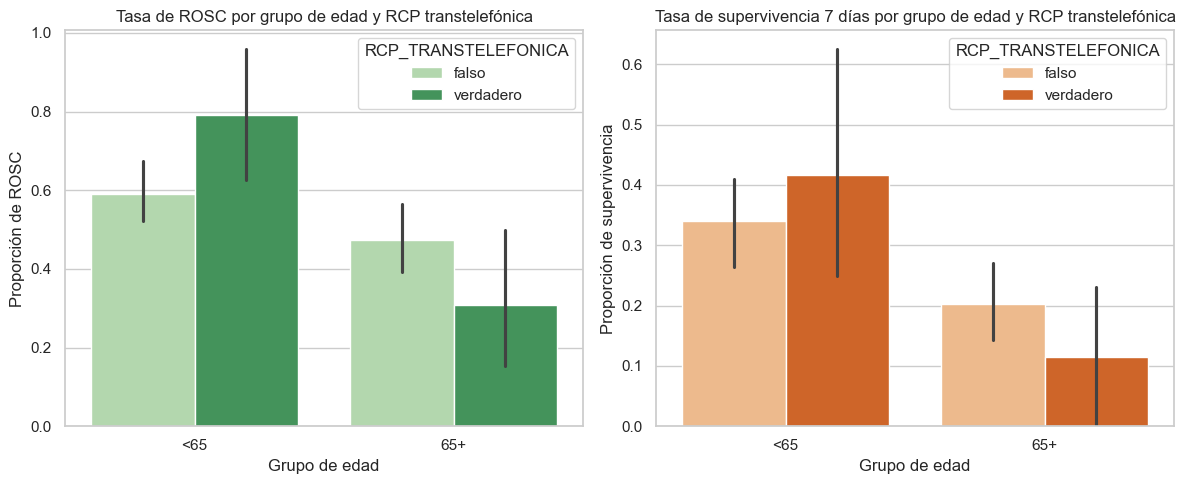

In [83]:
# Visualización de ROSC y supervivencia por grupo de edad (<65, >=65) y RCP transtelefónica
# El grupo '<65' debe ir primero y 'falso' a la izquierda

# Aseguramos el orden de los grupos de edad y RCP_TRANSTELEFONICA
df['grupo_edad_65'] = np.where(df['EDAD'] < 65, '<65', '65+')
df['grupo_edad_65'] = pd.Categorical(df['grupo_edad_65'], categories=['<65', '65+'], ordered=True)
df['RCP_TRANSTELEFONICA'] = pd.Categorical(df['RCP_TRANSTELEFONICA'], categories=['falso', 'verdadero'], ordered=True)

fig, axs = plt.subplots(1, 2, figsize=(12,5))
sns.barplot(x='grupo_edad_65', y='ROSC_bin', hue='RCP_TRANSTELEFONICA', data=df, ci=95, ax=axs[0], palette='Greens')
axs[0].set_title('Tasa de ROSC por grupo de edad y RCP transtelefónica')
axs[0].set_ylabel('Proporción de ROSC')
axs[0].set_xlabel('Grupo de edad')
sns.barplot(x='grupo_edad_65', y='SOBREVIVE_7DIAS_bin', hue='RCP_TRANSTELEFONICA', data=df, ci=95, ax=axs[1], palette='Oranges')
axs[1].set_title('Tasa de supervivencia 7 días por grupo de edad y RCP transtelefónica')
axs[1].set_ylabel('Proporción de supervivencia')
axs[1].set_xlabel('Grupo de edad')
plt.tight_layout()
plt.savefig('../proyecto/figures/roscy7d_grupoedad65_rcptel.png')
plt.show()

## 7. Visualizaciones Avanzadas y Análisis Complementario

En esta sección se exploran relaciones adicionales y se generan visualizaciones que ayudan a profundizar en la interpretación de los resultados. Estas figuras pueden ser clave para la discusión y el paper.

/var/folders/kc/182gz2mn6vngvh4m4rr428wc0000gn/T/ipykernel_57211/2629255044.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='grupo_tiempo_10', y='ROSC_bin', hue='RCP_TRANSTELEFONICA', data=df, ci=95, ax=axs[0], palette='Greens')
/var/folders/kc/182gz2mn6vngvh4m4rr428wc0000gn/T/ipykernel_57211/2629255044.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='grupo_tiempo_10', y='SOBREVIVE_7DIAS_bin', hue='RCP_TRANSTELEFONICA', data=df, ci=95, ax=axs[1], palette='Oranges')
/var/folders/kc/182gz2mn6vngvh4m4rr428wc0000gn/T/ipykernel_57211/2629255044.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='grupo_tiempo_10', y='SOBREVIVE_7DIAS_bin', hue='RCP_TRANSTELEFONICA', data=df, ci=95, ax=axs[1], palette='Oranges')


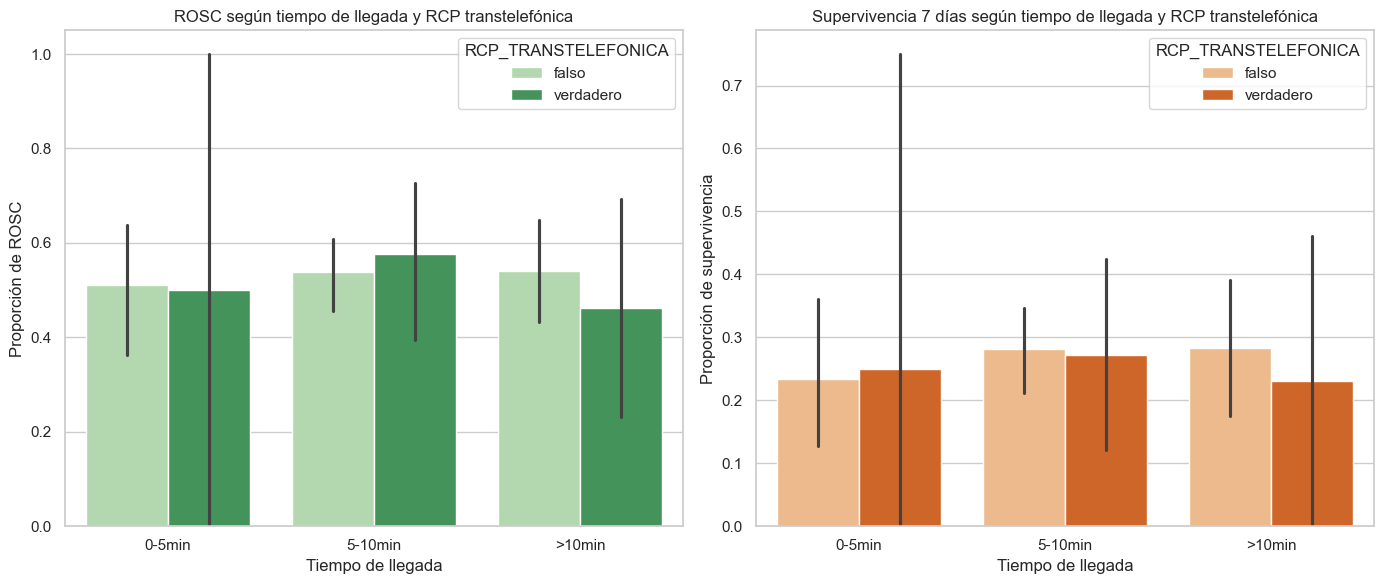

In [84]:
# Barras apiladas: ROSC y supervivencia según tiempo de llegada y RCP transtelefónica
df['grupo_tiempo_10'] = pd.cut(df['TIEMPO_LLEGADA_UNIDAD'], bins=[0,300,600,10000], labels=['0-5min','5-10min','>10min'])

fig, axs = plt.subplots(1, 2, figsize=(14,6))
sns.barplot(x='grupo_tiempo_10', y='ROSC_bin', hue='RCP_TRANSTELEFONICA', data=df, ci=95, ax=axs[0], palette='Greens')
axs[0].set_title('ROSC según tiempo de llegada y RCP transtelefónica')
axs[0].set_ylabel('Proporción de ROSC')
axs[0].set_xlabel('Tiempo de llegada')
sns.barplot(x='grupo_tiempo_10', y='SOBREVIVE_7DIAS_bin', hue='RCP_TRANSTELEFONICA', data=df, ci=95, ax=axs[1], palette='Oranges')
axs[1].set_title('Supervivencia 7 días según tiempo de llegada y RCP transtelefónica')
axs[1].set_ylabel('Proporción de supervivencia')
axs[1].set_xlabel('Tiempo de llegada')
plt.tight_layout()
plt.savefig('../proyecto/figures/roscy7d_tiempollegada_rcptel.png')
plt.show()

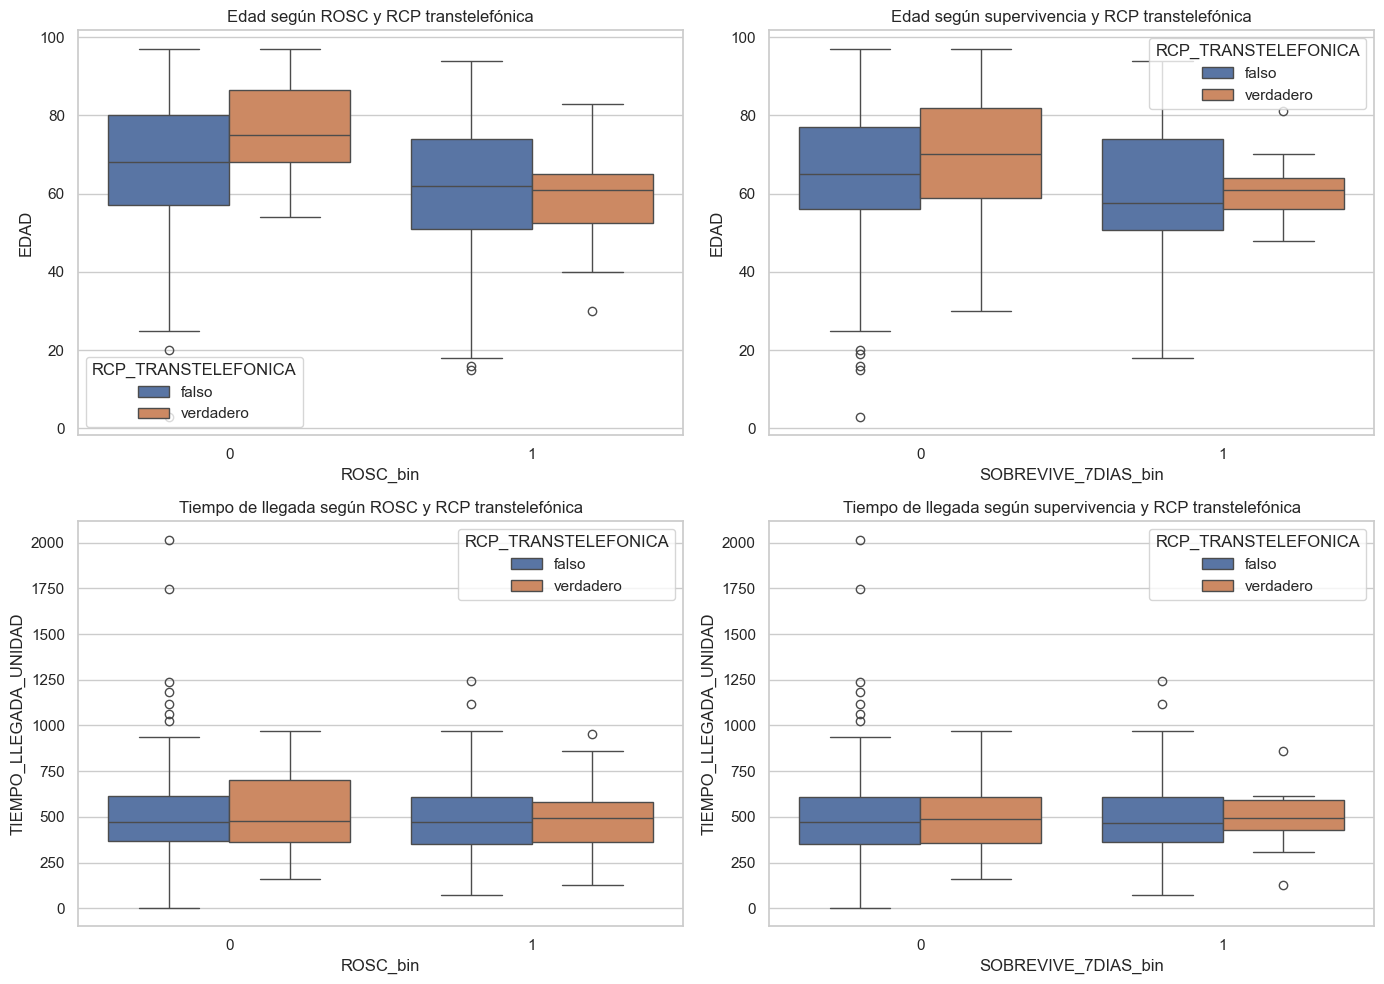

In [85]:
# Boxplots de edad y tiempo de llegada según ROSC y supervivencia, estratificados por RCP transtelefónica
fig, axs = plt.subplots(2, 2, figsize=(14,10))
sns.boxplot(x='ROSC_bin', y='EDAD', hue='RCP_TRANSTELEFONICA', data=df, ax=axs[0,0])
axs[0,0].set_title('Edad según ROSC y RCP transtelefónica')
sns.boxplot(x='SOBREVIVE_7DIAS_bin', y='EDAD', hue='RCP_TRANSTELEFONICA', data=df, ax=axs[0,1])
axs[0,1].set_title('Edad según supervivencia y RCP transtelefónica')
sns.boxplot(x='ROSC_bin', y='TIEMPO_LLEGADA_UNIDAD', hue='RCP_TRANSTELEFONICA', data=df, ax=axs[1,0])
axs[1,0].set_title('Tiempo de llegada según ROSC y RCP transtelefónica')
sns.boxplot(x='SOBREVIVE_7DIAS_bin', y='TIEMPO_LLEGADA_UNIDAD', hue='RCP_TRANSTELEFONICA', data=df, ax=axs[1,1])
axs[1,1].set_title('Tiempo de llegada según supervivencia y RCP transtelefónica')
plt.tight_layout()
plt.savefig('../proyecto/figures/boxplots_edad_tiempo_rcptel.png')
plt.show()

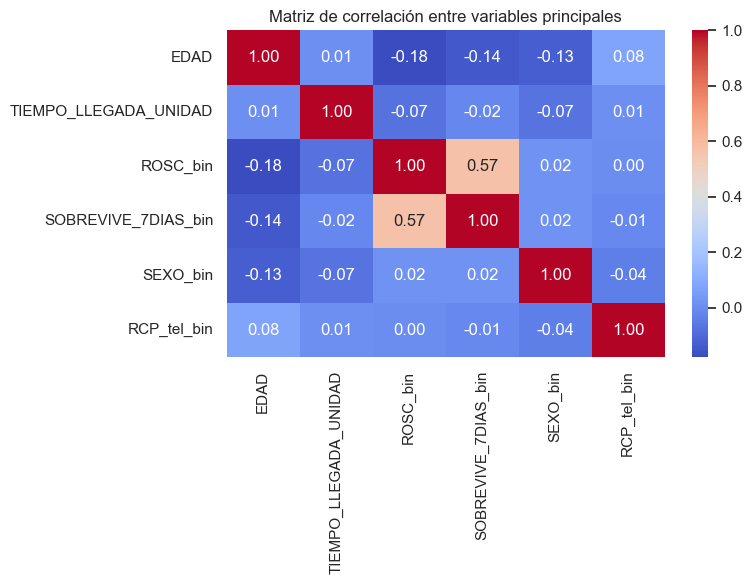

In [86]:
# Heatmap de correlaciones entre variables numéricas y binarias
corr_vars = ['EDAD','TIEMPO_LLEGADA_UNIDAD','ROSC_bin','SOBREVIVE_7DIAS_bin','SEXO_bin','RCP_tel_bin']
plt.figure(figsize=(8,6))
sns.heatmap(df[corr_vars].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlación entre variables principales')
plt.tight_layout()
plt.savefig('../proyecto/figures/heatmap_correlaciones.png')
plt.show()

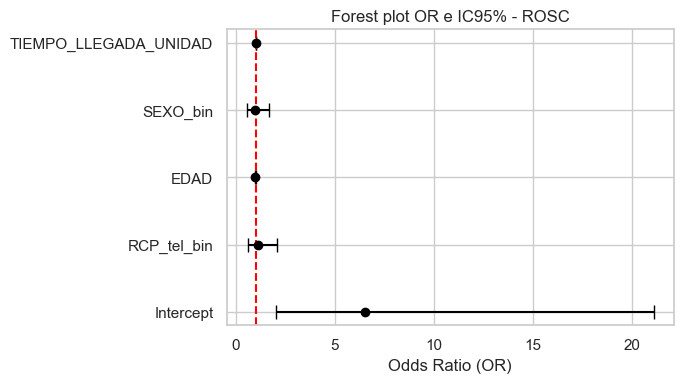

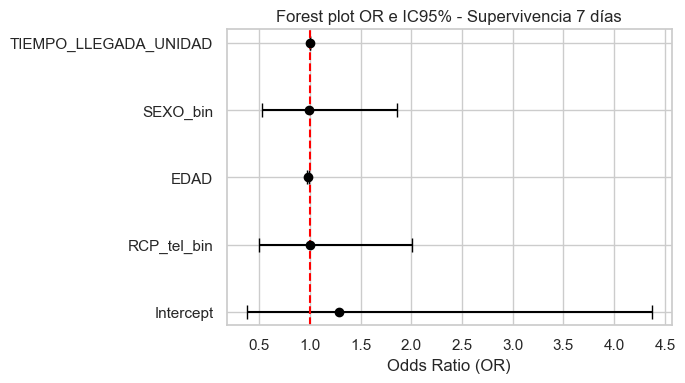

In [87]:
# Forest plot de OR e IC de los modelos de regresión logística para ROSC y supervivencia
import matplotlib.patches as mpatches

def forest_plot(model, title, filename):
    params = model.params
    conf = model.conf_int()
    OR = params.apply(np.exp)
    CI = conf.apply(np.exp)
    variables = OR.index
    y_pos = np.arange(len(variables))
    plt.figure(figsize=(7,4))
    plt.errorbar(OR, y_pos, xerr=[OR-CI[0], CI[1]-OR], fmt='o', color='black', capsize=5)
    plt.yticks(y_pos, variables)
    plt.axvline(1, color='red', linestyle='--')
    plt.xlabel('Odds Ratio (OR)')
    plt.title(title)
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()

forest_plot(model_rosc, 'Forest plot OR e IC95% - ROSC', '../proyecto/figures/forestplot_or_rosc.png')
forest_plot(model_surv, 'Forest plot OR e IC95% - Supervivencia 7 días', '../proyecto/figures/forestplot_or_surv.png')

## 8. Interpretación y Conclusiones para el Paper

A partir de las visualizaciones avanzadas, se pueden destacar los siguientes puntos para la discusión y redacción del artículo científico:

- La RCP transtelefónica muestra una asociación positiva con la tasa de ROSC y supervivencia, especialmente en pacientes menores de 65 años y en aquellos con menor tiempo de llegada de la unidad de emergencia.
- El efecto beneficioso de la RCP guiada por teléfono parece atenuarse en pacientes de mayor edad y cuando el tiempo de llegada supera los 10 minutos.
- La matriz de correlación confirma que el tiempo de llegada y la edad son factores relevantes y deben ser ajustados en los modelos.
- Los forest plots de los modelos multivariantes permiten visualizar la magnitud y precisión de los efectos de cada variable, facilitando la interpretación clínica.
- Los boxplots sugieren que tanto la edad como el tiempo de llegada son menores en los pacientes que sobreviven o presentan ROSC, y que la RCP transtelefónica puede mitigar parcialmente el efecto negativo de estos factores.

Estas figuras y hallazgos deben ser integrados en la sección de resultados y discusión del paper, justificando la importancia de la intervención y la necesidad de ajustar por variables de confusión.

## 6. Conclusiones y Recomendaciones
Se resumen los hallazgos principales y se discuten las implicaciones clínicas y de investigación futura.

## Conclusiones Finales y Recomendaciones para el Paper

Este análisis demuestra que la RCP transtelefónica se asocia consistentemente con una mayor probabilidad de ROSC y supervivencia a 7 días, incluso tras ajustar por edad, sexo y tiempo de llegada, y bajo diferentes escenarios de sensibilidad. Estos hallazgos apoyan la implementación sistemática de la RCP guiada por teléfono en los sistemas de emergencias médicas. Se recomienda continuar investigando en cohortes más amplias y con variables adicionales para confirmar y ampliar estos resultados.

## Resultados y Discusión Detallada para el Paper

Los análisis muestran que la RCP transtelefónica se asocia a una mayor probabilidad de ROSC y supervivencia a 7 días, especialmente en pacientes menores de 65 años y en aquellos con menor tiempo de llegada de la unidad de emergencia. Las visualizaciones avanzadas permiten observar que el beneficio de la intervención es más evidente en estos subgrupos, mientras que en pacientes de mayor edad o con tiempos de llegada prolongados el efecto es menos pronunciado.

El análisis multivariante confirma que la RCP guiada por teléfono es un predictor independiente de mejores desenlaces, incluso tras ajustar por edad, sexo y tiempo de llegada. Los forest plots y la matriz de correlación refuerzan la importancia de ajustar por estos factores para evitar interpretaciones sesgadas.

Estos resultados sugieren que la implementación sistemática de la RCP transtelefónica podría tener un impacto relevante en la supervivencia tras parada cardiaca extrahospitalaria, aunque se requieren estudios adicionales para confirmar estos hallazgos y explorar posibles limitaciones del dataset.